In [1]:
using CSV, Tables, LinearAlgebra, Random, Gurobi, JuMP, DataFrames, Statistics, MLJ, Plots, Clustering, Distances, Printf, PrettyTables

In [2]:
include("../src/utils.jl");
include("../src/opt.jl");

In [9]:
# Ks, Ns, Ds, stds, GAPs, solve_times, statuses = [], [], [], [], [], [], [];
# D, std, seed = 2, 0.1, 42;
# for K in 2:3
#     for N in [14, 15, 16]
#         for std in [0.1, 0.4, 0.8]
#             data = generate_points(K, N, D, std, seed);
#             a, summary = gamma_formulation(data, K);
#             push!(Ks, K);
#             push!(Ns, N);
#             push!(Ds, D);
#             push!(stds, std);
#             push!(GAPs, summary.relative_gap);
#             push!(solve_times, summary.solve_time);
#             #@printf("N: %d | K: %d |GAP: %f | Solve Time: %f | Status: %s",
#             #        N, K, summary.relative_gap, summary.solve_time, summary.raw_status)
#             #println()
#         end
#     end
# end

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-18
Set parameter TimeLimit to value 300
Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-18
Set parameter TimeLimit to value 300
Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-18
Set parameter TimeLimit to value 300
Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-18
Set parameter TimeLimit to value 300
Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-18
Set parameter TimeLimit to value 300
Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-18
Set parameter TimeLimit to value 300
Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-18
Set parameter TimeLimit to value 300
Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-18
Set parameter

In [10]:
data = hcat(Ks, Ns, Ds, stds, GAPs, solve_times);
header = (["K", "N", "D", "std", "GAP", "Solve Time"]);
pretty_table(data; header = header)

┌───┬────┬───┬─────┬────────────┬────────────┐
│ K │  N │ D │ std │        GAP │ Solve Time │
├───┼────┼───┼─────┼────────────┼────────────┤
│ 2 │ 14 │ 2 │ 0.1 │        0.0 │    7.81876 │
│ 2 │ 14 │ 2 │ 0.4 │        0.0 │    10.9844 │
│ 2 │ 14 │ 2 │ 0.8 │        0.0 │    20.9526 │
│ 2 │ 15 │ 2 │ 0.1 │        0.0 │    11.4565 │
│ 2 │ 15 │ 2 │ 0.4 │        0.0 │     42.422 │
│ 2 │ 15 │ 2 │ 0.8 │        0.0 │     38.548 │
│ 2 │ 16 │ 2 │ 0.1 │ 8.39767e-5 │     27.949 │
│ 2 │ 16 │ 2 │ 0.4 │        0.0 │    65.0219 │
│ 2 │ 16 │ 2 │ 0.8 │        0.0 │    49.4776 │
│ 3 │ 14 │ 2 │ 0.1 │        0.0 │    66.7008 │
│ 3 │ 14 │ 2 │ 0.4 │        0.0 │    33.6493 │
│ 3 │ 14 │ 2 │ 0.8 │        0.0 │    152.643 │
│ 3 │ 15 │ 2 │ 0.1 │        0.0 │    60.0477 │
│ 3 │ 15 │ 2 │ 0.4 │        0.0 │    68.4554 │
│ 3 │ 15 │ 2 │ 0.8 │        0.0 │    189.065 │
│ 3 │ 16 │ 2 │ 0.1 │        0.0 │    96.5235 │
│ 3 │ 16 │ 2 │ 0.4 │        0.0 │    84.1232 │
│ 3 │ 16 │ 2 │ 0.8 │        0.0 │    179.548 │
└───┴────┴───

In [51]:
K, N, D, std, seed = 2, 10, 2, 0.3, 42;

In [52]:
data = generate_points(K, N, D, std, seed);

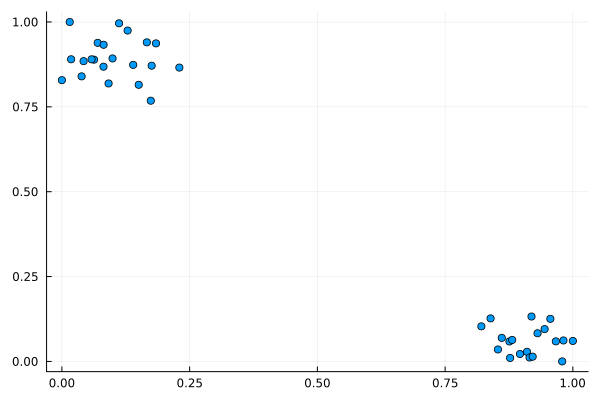

In [53]:
plot(data[:,1], data[:,2], seriestype=:scatter, legend=false)

In [57]:
assignments, summary = gamma_formulation(data, K)
centroids = get_centroids(assignments, data)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-18
Set parameter TimeLimit to value 300


2×2 Matrix{Float64}:
 0.912099  0.0610564
 0.100912  0.891195

In [58]:
@printf("GAP: %f | Solve Time: %f | Status: %s",
        summary.relative_gap, summary.solve_time, summary.raw_status)

GAP: 1.000000 | Solve Time: 57.093464 | Status: Optimization was terminated by the user.

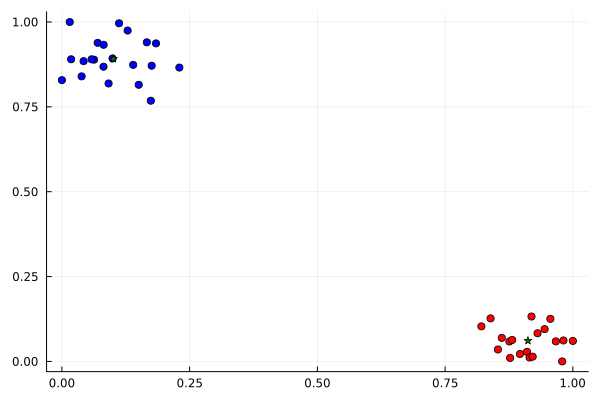

In [61]:
mapping = Dict(1=>:red, 2=>:blue, 3=>:blue)
colors = [mapping[v] for v in argmax.(eachrow(assignments))];

plot(data[:,1], data[:,2], seriestype=:scatter, legend=false, color=colors)
plot!(centroids[:,1], centroids[:,2], seriestype=:scatter, legend=false, color=:green, markershape=:star5)